In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-organizations-social-network-analysis/organization.csv


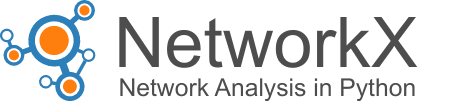

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import json
import os,re

In [3]:
import networkx as nx

In [4]:
data=pd.read_csv('../input/github-organizations-social-network-analysis/organization.csv')

### Drawing the Graph 🕸

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24034 (\N{CJK UNIFIED IDEOGRAPH-5DE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40527 (\N{CJK UNIFIED IDEOGRAPH-9E4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda

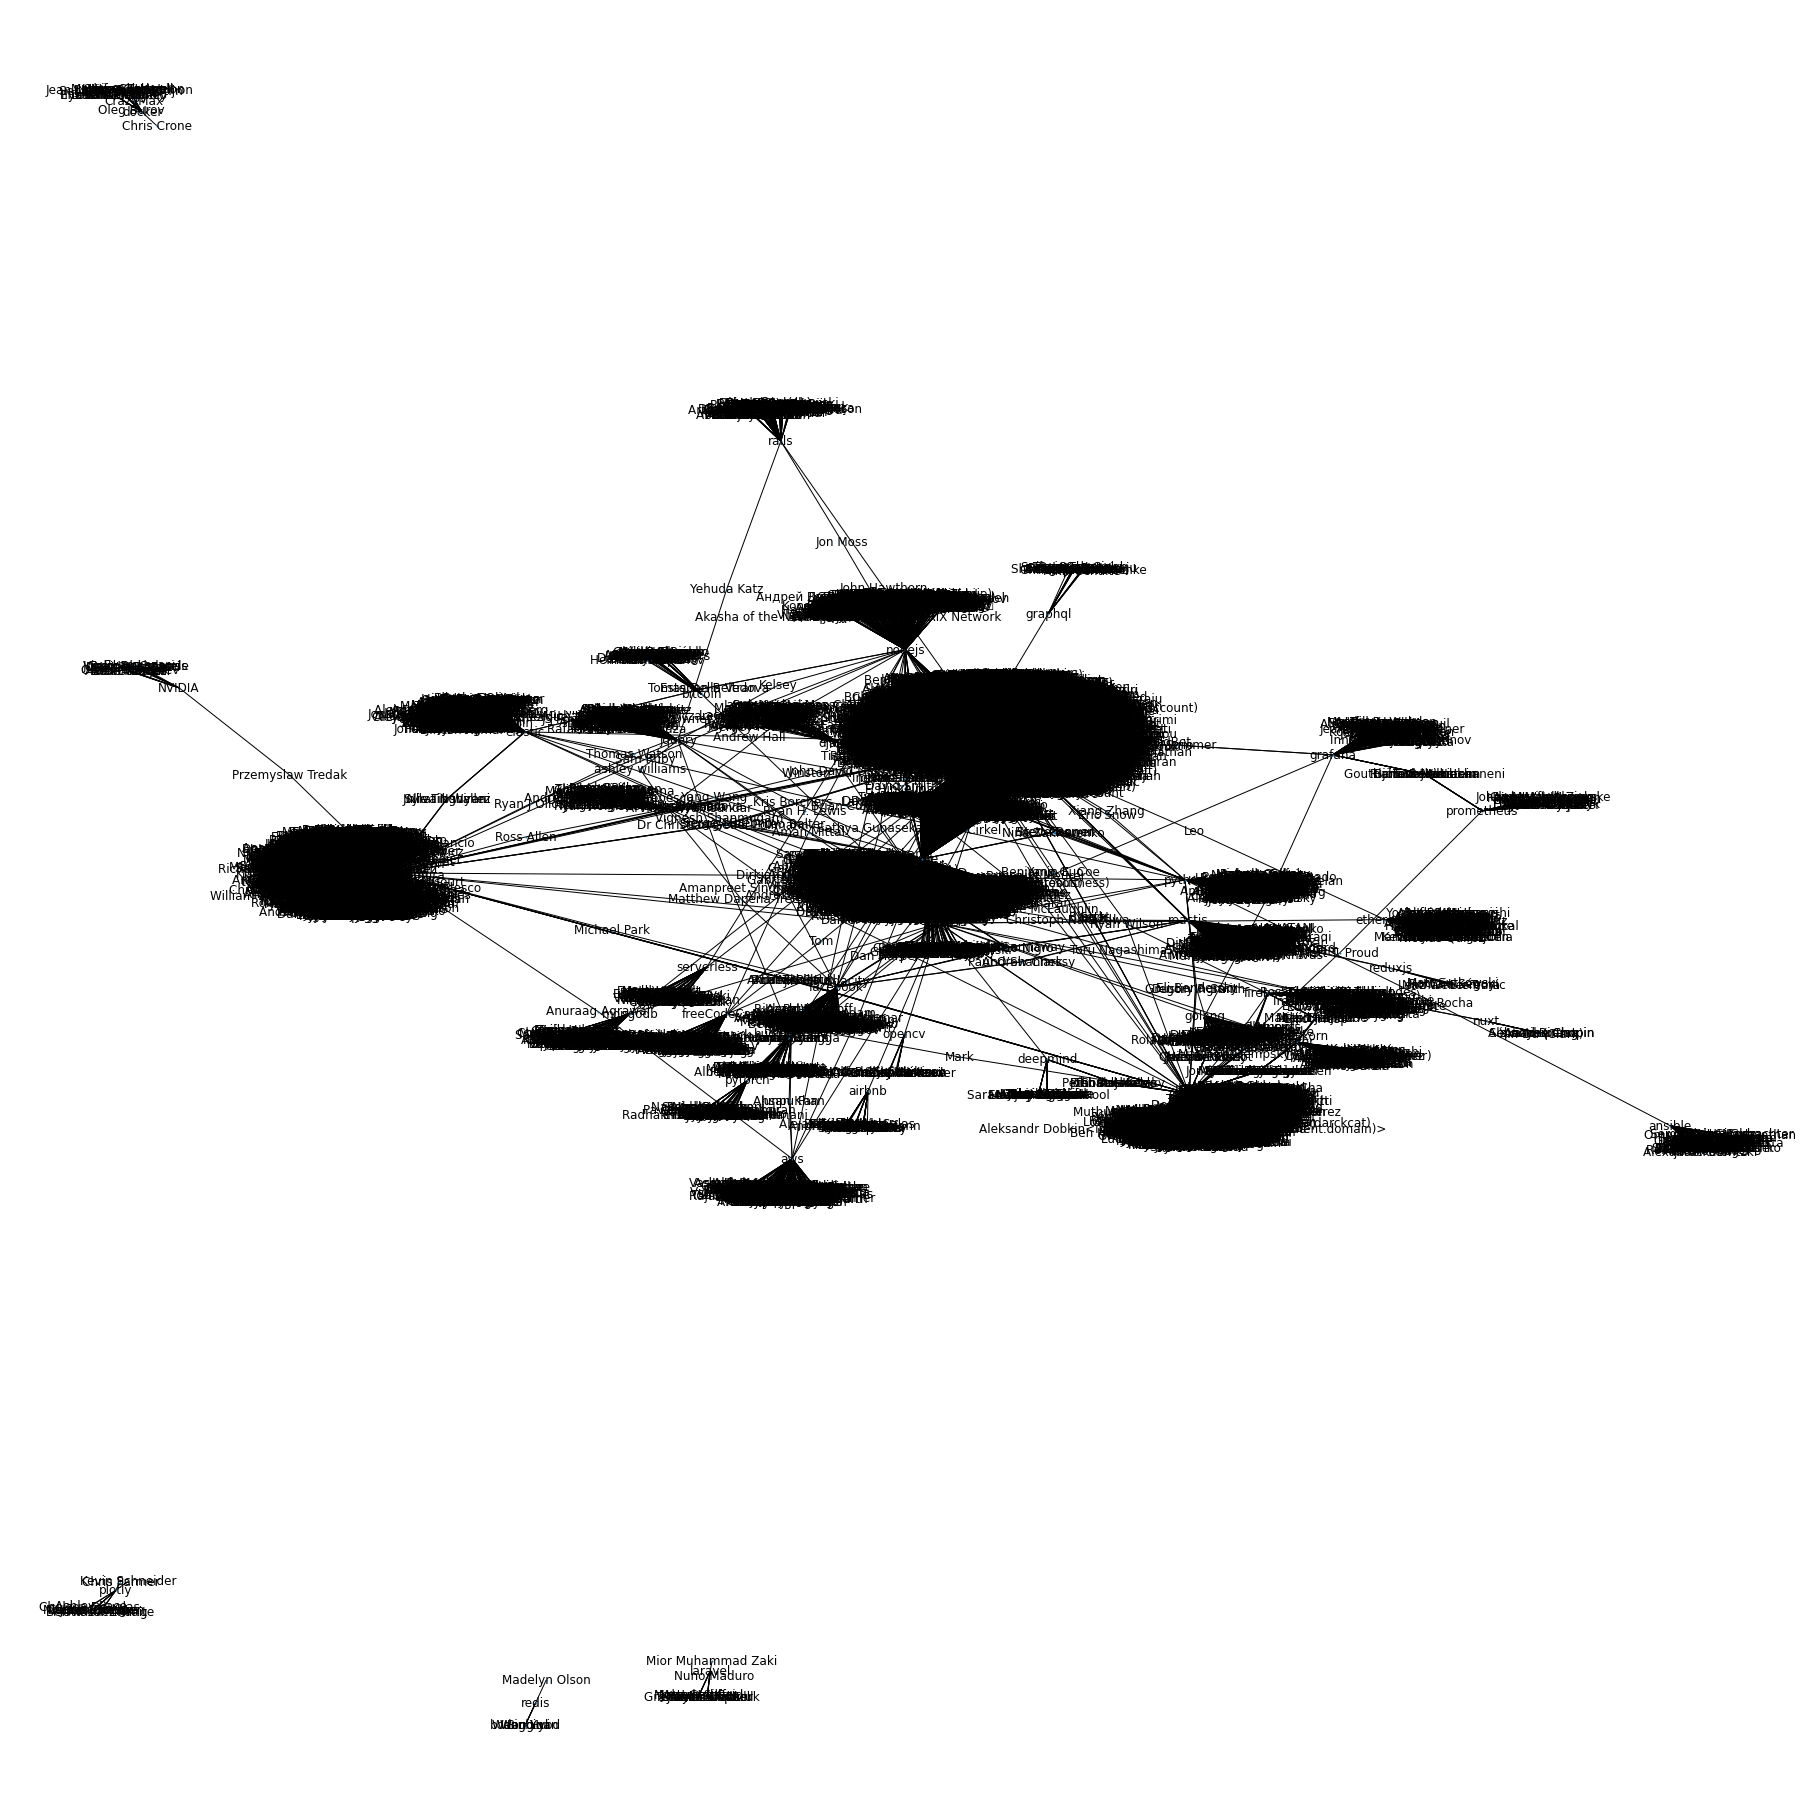

In [5]:
from networkx.algorithms import bipartite
B=nx.Graph()
B.add_nodes_from(data['Organisation'],bipartite=0)
B.add_nodes_from(data['member'],bipartite=1)
for i in range(len(data)):
  B.add_edges_from([(data.iloc[i,1],data.iloc[i,0])])
# nx.draw(B,with_labels=1)
plt.figure(figsize=(25,25))
nx.draw(B, with_labels=True, node_size=1)
plt.show()

### Closeness Centrality 🤗

In [6]:
cc=nx.closeness_centrality(B, u=None, distance=None, wf_improved=True)
cc

{'ethereum': 0.3258929067749012,
 'pytorch': 0.3252680383695806,
 'udacity': 0.3242398441734553,
 'firebase': 0.3250522956954464,
 'flutter': 0.325724436916883,
 'deepmind': 0.32459777747214547,
 'reactjs': 0.32758724006918544,
 'huggingface': 0.3266168987182696,
 'google': 0.348088911711113,
 'docker': 0.0020181634712411706,
 'apache': 0.3538983070120768,
 'vuejs': 0.3255080885823995,
 'freeCodeCamp': 0.3258929067749012,
 'airbnb': 0.3247411721610597,
 'golang': 0.3255801727534888,
 'nodejs': 0.33704987011244936,
 'elastic': 0.3282210597031934,
 'laravel': 0.0012333221213140487,
 'aws': 0.3281966366762046,
 'Azure': 0.3725198142138102,
 'reduxjs': 0.1975825202836318,
 'NVIDIA': 0.20698458868513364,
 'redis': 0.0005606009642336585,
 'rails': 0.24770496463503947,
 'grafana': 0.32610976711952033,
 'jquery': 0.24426175999842237,
 'ansible': 0.19901789550995003,
 'graphql': 0.1976179309239443,
 'babel': 0.32719841248453363,
 'atom': 0.3266168987182696,
 'prometheus': 0.20579668721031694,
 

### Finding Cliques in the Graph

In [7]:
cliques=nx.find_cliques(B)
for cl in cliques:
  print(cl)

['Tong Chen', 'Azure']
['Aleksandr Dobkin<img src=404 onerror=alert(document.domain)>', 'google']
['Frank Schmid', 'serverless']
['Rohit Yadav', 'apache']
['Trevor Rowe', 'aws']
['anpintil', 'Azure']
['Bryan Yeung', 'google']
['Takashi Nakagawa', 'nodejs']
['Yosuke Ota', 'vuejs']
['Kamil Śliwak', 'ethereum']
['Darryl L. Pierce', 'apache']
['Ali Sawari', 'nodejs']
['Yacine Jernite', 'huggingface']
['Francisco Massa', 'pytorch']
['Jennifer Dai', 'apache']
['Chris Stackhouse', 'Azure']
['Jason Tedor', 'elastic']
['Artem Belevich', 'google']
['Igal Sapir', 'apache']
['Jinmei Liao', 'apache']
['Joseph Bradley', 'apache']
['Oleksandr Kushchak', 'nodejs']
['Sharath Malladi', 'Azure']
['Alex Waygood', 'python']
['Ravikanth Musti', 'Azure']
['Frederick Lefebvre', 'aws']
['Ian Hickson', 'flutter']
['Travis Leithead', 'Azure']
['Grant Wuerker', 'ethereum']
['Pieter De Baets', 'facebook']
['Tyler Kellen', 'jquery']
['Valentin Kulichenko', 'apache']
['Daniel Gottlieb', 'mongodb']
['Stas Bekman', 'h

### Drawing a Max Bipartite Clique

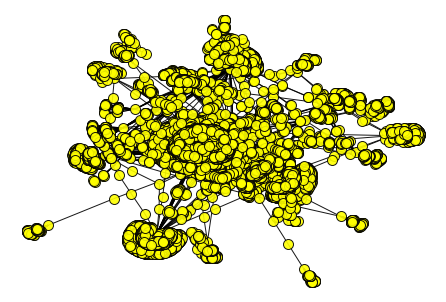

In [8]:
max_clique_biparti=nx.make_clique_bipartite(B, fpos=None, create_using=None, name=None)
options = {"edgecolors": "black", "node_size": 100, "alpha": 0.9}
nx.draw(max_clique_biparti,node_color="yellow",**options)

### Local Bridges

In [9]:
lb=nx.local_bridges(B)
sum=0
for bridge in lb:
    sum=sum+1
print("Number of Local Bridges are:",sum)

Number of Local Bridges are: 9656
